<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/SVM_Q1_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
test=pd.read_csv("/content/SalaryData_Test.csv")

In [37]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [55]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [45]:
test[test.isnull().any(axis=1)].shape


(0, 14)

In [47]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

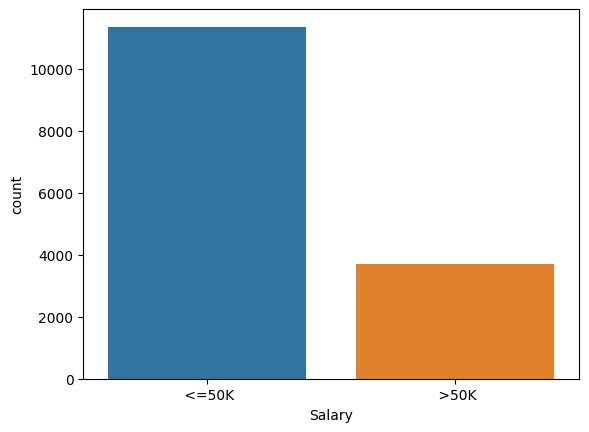

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [56]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

In [58]:
x = test.iloc[:,0:13]
y = test.iloc[:,13]

In [59]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [60]:
y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, stratify = y)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [65]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10542, 13), (10542,), (4518, 13), (4518,))

In [77]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
test['Salary']= label_encoder.fit_transform(test['Salary'])
test['race']= label_encoder.fit_transform(test['race'])
test['sex']= label_encoder.fit_transform(test['sex'])
test['maritalstatus']= label_encoder.fit_transform(test['maritalstatus'])
test['education']= label_encoder.fit_transform(test['education'])
test['workclass']= label_encoder.fit_transform(test['workclass'])
test['relationship']= label_encoder.fit_transform(test['relationship'])

In [78]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,Machine-op-inspct,3,2,1,0,0,40,United-States,0
1,38,2,11,9,2,Farming-fishing,0,4,1,0,0,50,United-States,0
2,28,1,7,12,2,Protective-serv,0,4,1,0,0,40,United-States,1
3,44,2,15,10,2,Machine-op-inspct,0,2,1,7688,0,40,United-States,1
4,34,2,0,6,4,Other-service,1,4,1,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,Prof-specialty,3,4,1,0,0,40,United-States,0
15056,39,2,9,13,0,Prof-specialty,1,4,0,0,0,36,United-States,0
15057,38,2,9,13,2,Prof-specialty,0,4,1,0,0,50,United-States,0
15058,44,2,9,13,0,Adm-clerical,3,1,1,5455,0,40,United-States,0


In [80]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [85]:
##Preprocessing the data. As, there are categorical variables
label_encoder =preprocessing.LabelEncoder()
for i in string_columns:
        test[i]=label_encoder.fit_transform(test[i])

In [86]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [88]:
##Capturing the column names which can help in futher process
colnames = test.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [89]:
x_test = test[colnames[0:13]]
y_test = test[colnames[13]]

In [ ]:
##  Grid search cv
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,10,0,5],'C':[15,14,13,12,11,10,0.1,0.01]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_test,y_test)
